[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                         product_name  product_price  \
49  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0   
22  Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0   
28  Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...        13999.0   
39  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...         8499.0   
10  Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...        30999.0   

    Sentiment  Sentiment_Polarity  Review Count  
49        0.0            0.245098          4362  
22        0.0            0.255085          2805  
28        0.0            0.231171          2122  
39        0.0            0.244624          1743  
10        0.0            0.249800          1646  
                                            product_name  product_price Rate  \
0      Thomson Alpha 80 cm (32 inch) HD Ready LED Sma...         7999.0    5   
1      Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...        13999.0    5   
2      cello Pack of 18 Opa

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


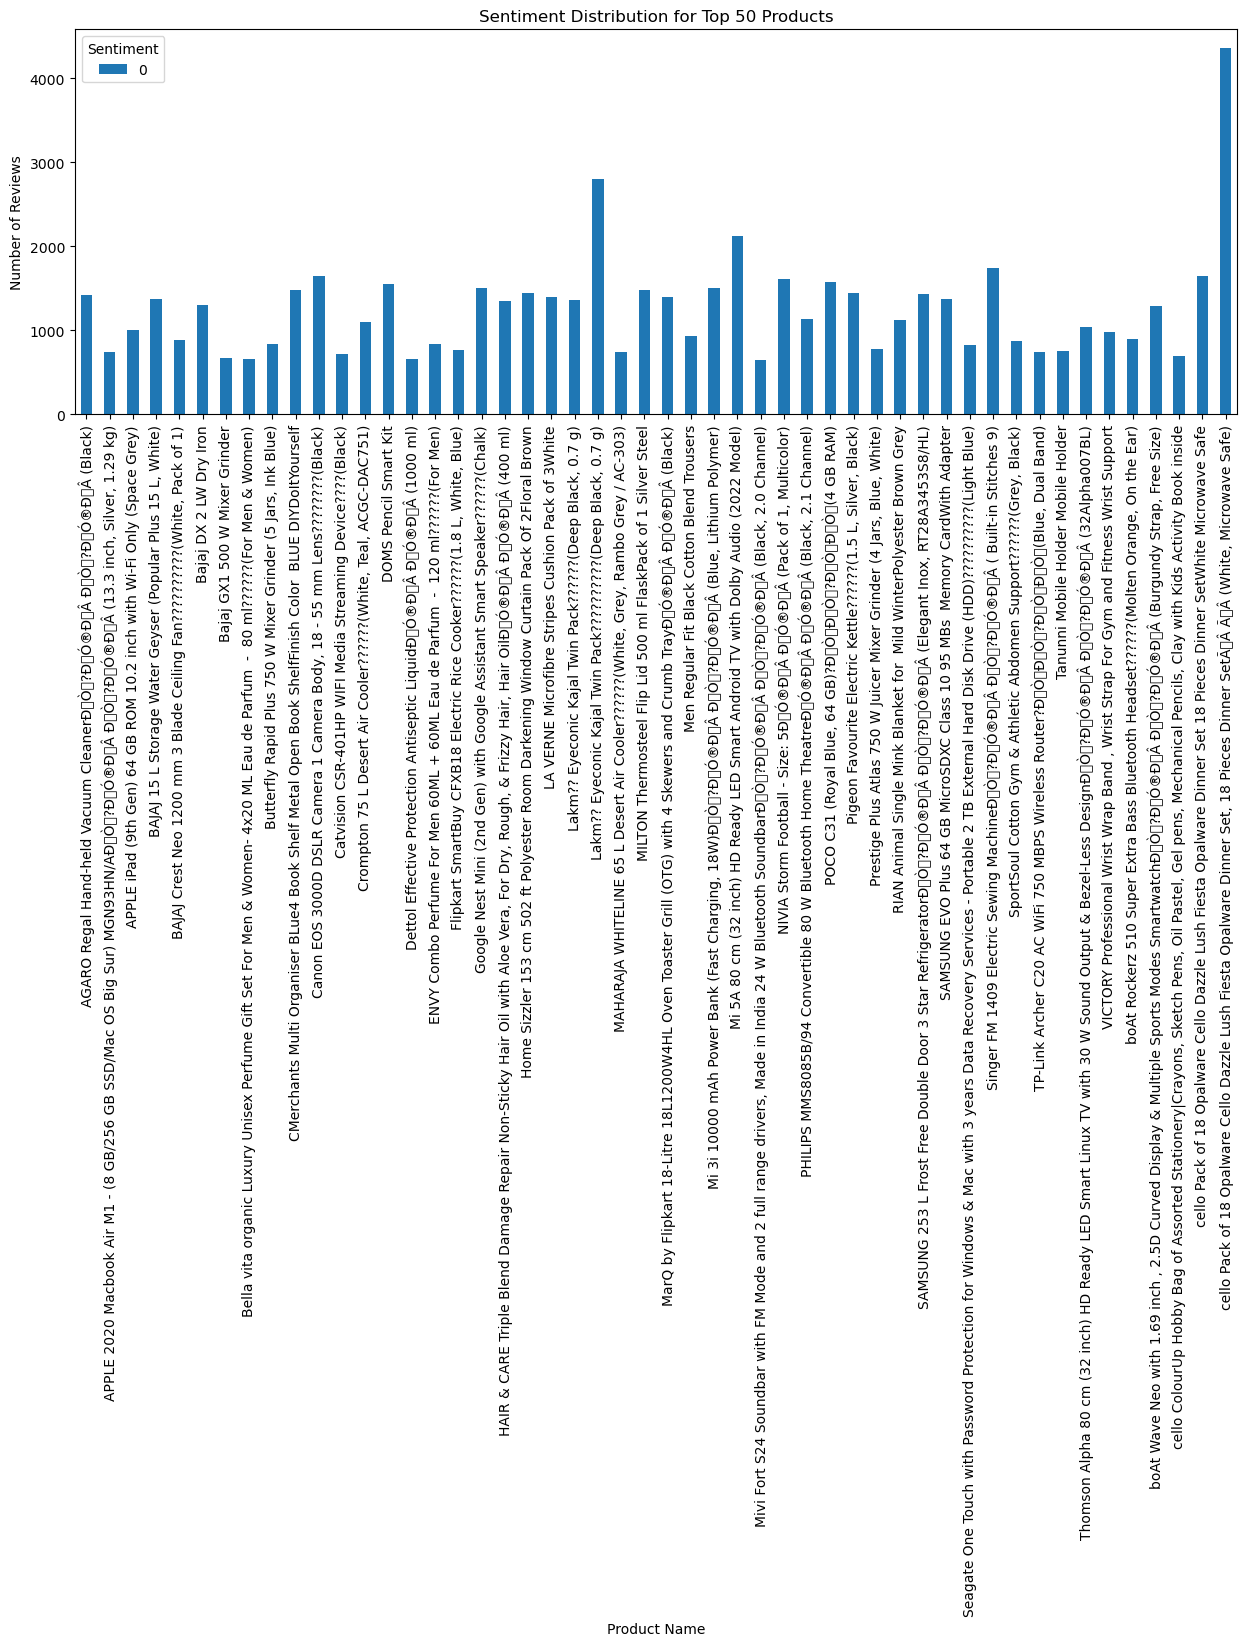

In [4]:
# Add sentiment polarity scores using VADER.

import pandas as pd
import nltk
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['Review'] = df['Review'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Assign labels to sentiments (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Add sentiment polarity scores using VADER
sid = SentimentIntensityAnalyzer()
df['Sentiment_Polarity'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Get the top 50 products based on the number of reviews
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# Create a new dataframe with only the top products
df_top_products = df[df['product_name'].isin(top_products)]

# Shuffle the rows of the dataframe
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)

# Convert the product_price column to numeric
df_top_products['product_price'] = pd.to_numeric(df_top_products['product_price'], errors='coerce')

# Find the best selling product name and price with sentiment
best_selling_product = df_top_products.groupby('product_name').agg({'product_price': 'mean', 'Sentiment': 'mean', 'Sentiment_Polarity': 'mean', 'Review': 'count'}).reset_index()
best_selling_product.rename(columns={'Review': 'Review Count'}, inplace=True)
best_selling_product.sort_values(by=['Review Count', 'Sentiment_Polarity', 'product_price'], ascending=False, inplace=True)
print(best_selling_product.head())

# Define a function to calculate the sentiment polarity of a review
def get_sentiment_polarity(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply the function to the Review column to get the sentiment polarity of each review
df_top_products['Sentiment_Polarity'] = df_top_products['Review'].apply(get_sentiment_polarity)

# Print the resulting dataframe
print(df_top_products)


# Group the dataframe by product name and sentiment, and count the number of reviews in each group
sentiment_counts = df_top_products.groupby(['product_name', 'Sentiment']).size()

# Unstack the sentiment level to create separate columns for positive and negative sentiment
sentiment_counts = sentiment_counts.unstack()

# Plot a bar chart of the sentiment distribution for each product
sentiment_counts.plot(kind='bar', stacked=True, figsize=(15, 5))

# Set the title and axis labels
plt.title('Sentiment Distribution for Top 50 Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        product_name  product_price  \
0  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0   
1  Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0   
2  Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...        13999.0   
3  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...         8499.0   
4  Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...        30999.0   

   Sentiment  Sentiment_Polarity  Review Count  Average_Rate  
0        0.0            0.245098          4362      4.270518  
1        0.0            0.255085          2805      4.475223  
2        0.0            0.231171          2122      4.131951  
3        0.0            0.244624          1743      4.324727  
4        0.0            0.249800          1646      4.453827  
                                            product_name  product_price  Rate  \
0      Lakm?? Eyeconic Kajal Twin Pack??????(Deep Bla...          218.0   4.0   
1      Bella vita organic Luxury 

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


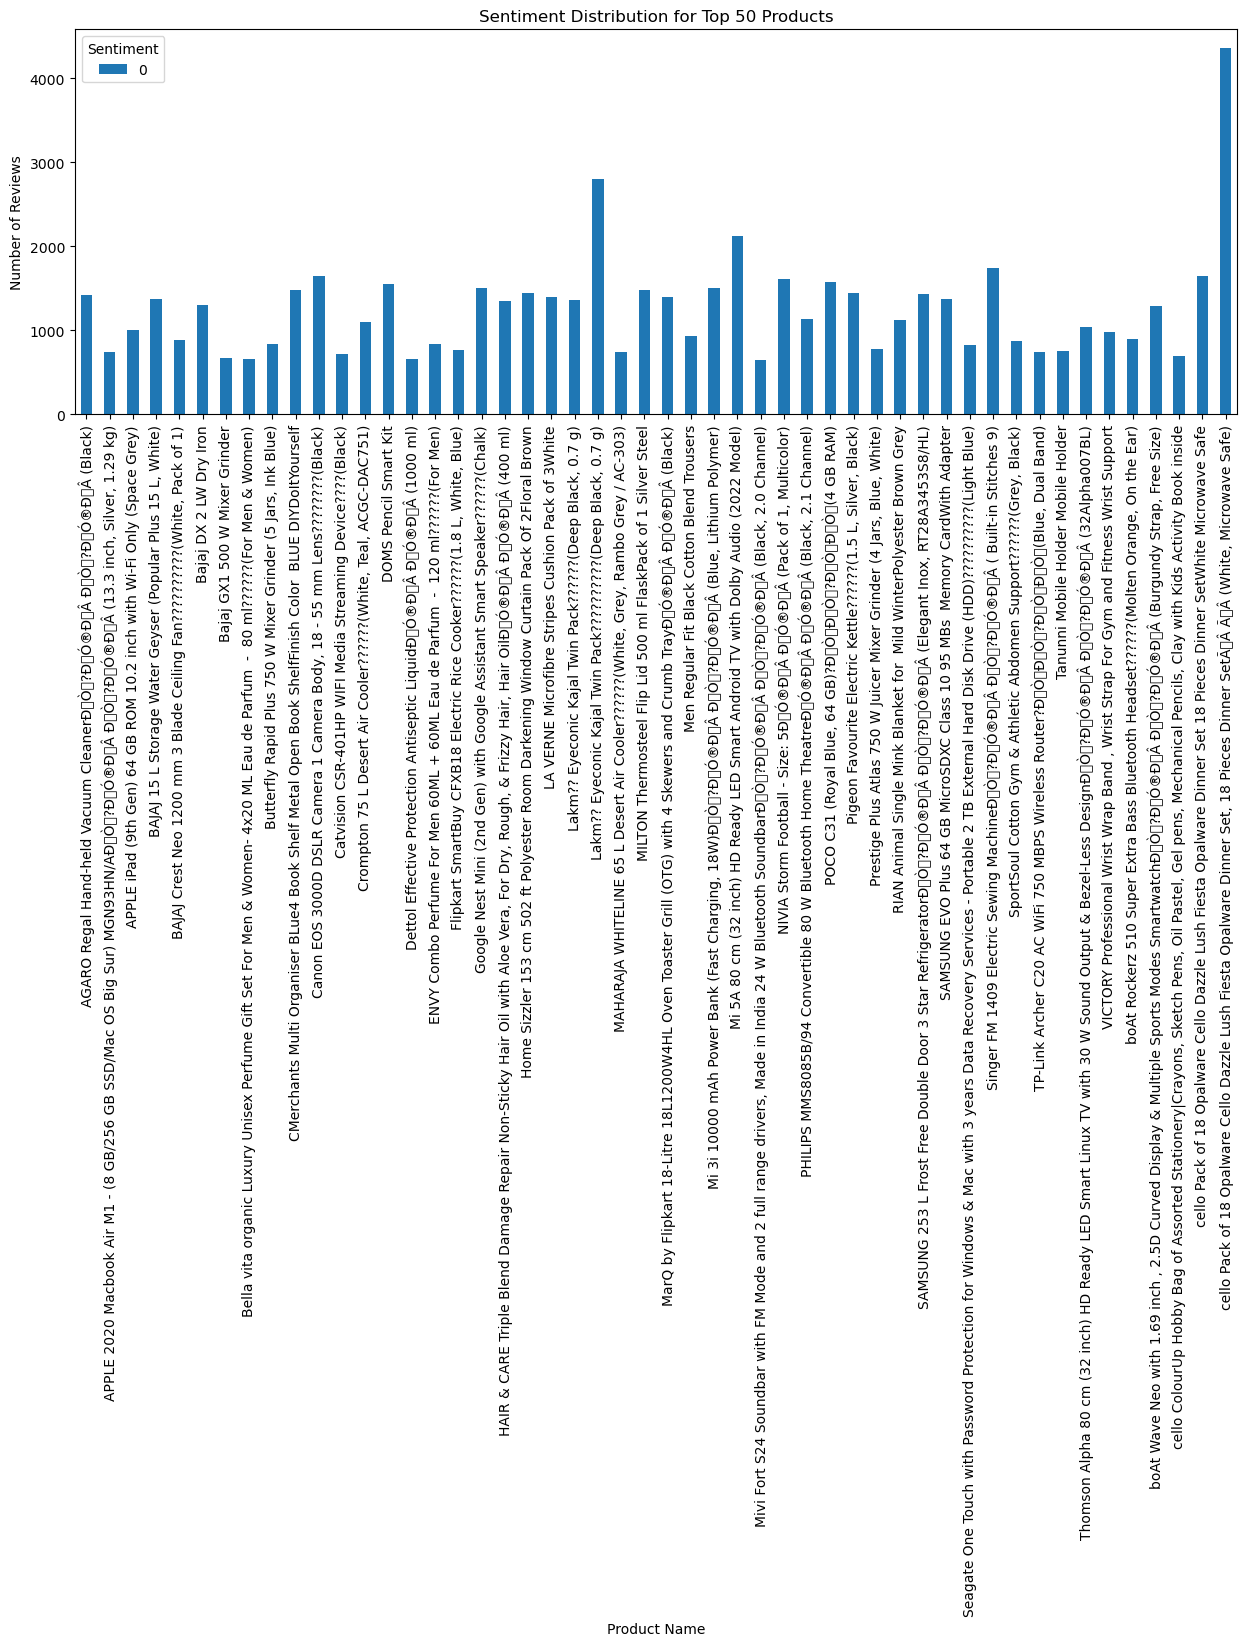

In [6]:
#using average rate feature ..


import pandas as pd
import nltk
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['Review'] = df['Review'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Assign labels to sentiments (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Add sentiment polarity scores using VADER
sid = SentimentIntensityAnalyzer()
df['Sentiment_Polarity'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Get the top 50 products based on the number of reviews
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# Create a new dataframe with only the top products
df_top_products = df[df['product_name'].isin(top_products)]

# Shuffle the rows of the dataframe
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)

# Convert the product_price column to numeric
df_top_products['product_price'] = pd.to_numeric(df_top_products['product_price'], errors='coerce')


# Convert the product_price column to numeric
df_top_products['Rate'] = pd.to_numeric(df_top_products['Rate'], errors='coerce')


# Compute the mean of the Rate column for each product
average_rate = df_top_products.groupby('product_name')['Rate'].mean().reset_index()
average_rate.rename(columns={'Rate': 'Average_Rate'}, inplace=True)

# Merge the average_rate dataframe with the best_selling_product dataframe
best_selling_product = df_top_products.groupby('product_name').agg({'product_price': 'mean', 'Sentiment': 'mean', 'Sentiment_Polarity': 'mean', 'Review': 'count'}).reset_index()
best_selling_product.rename(columns={'Review': 'Review Count'}, inplace=True)
best_selling_product.sort_values(by=['Review Count', 'Sentiment_Polarity', 'product_price'], ascending=False, inplace=True)
best_selling_product = pd.merge(best_selling_product, average_rate, on='product_name')

# Define a function to calculate the sentiment polarity of a review
def get_sentiment_polarity(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply the function to the Review column to get the sentiment polarity of each review
df_top_products['Sentiment_Polarity'] = df_top_products['Review'].apply(get_sentiment_polarity)



# Print the resulting dataframes
print(best_selling_product.head())
print(df_top_products)

# Group the dataframe by product name and sentiment, and count the number of reviews in each group
sentiment_counts = df_top_products.groupby(['product_name', 'Sentiment']).size()

# Unstack the sentiment level to create separate columns for positive and negative sentiment
sentiment_counts = sentiment_counts.unstack()

# Plot a bar chart of the sentiment distribution for each product
sentiment_counts.plot(kind='bar', stacked=True, figsize=(15, 5))

# Set the title and axis labels
plt.title('Sentiment Distribution for Top 50 Products')
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

# Show the plot
plt.show()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nh013\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                        product_name  product_price  \
0  cello Pack of 18 Opalware Cello Dazzle Lush Fi...         1299.0   
1  Lakm?? Eyeconic Kajal Twin Pack??????????(Deep...          218.0   
2  Mi 5A 80 cm (32 inch) HD Ready LED Smart Andro...        13999.0   
3  Singer FM 1409 Electric Sewing MachineÐÒ?ÐÓ...         8499.0   
4  Canon EOS 3000D DSLR Camera 1 Camera Body, 18 ...        30999.0   

   Sentiment  Sentiment_Polarity  Review Count  Average_Rate  
0        0.0            0.245098          4362      4.270518  
1        0.0            0.255085          2805      4.475223  
2        0.0            0.231171          2122      4.131951  
3        0.0            0.244624          1743      4.324727  
4        0.0            0.249800          1646      4.453827  
                                            product_name  product_price  Rate  \
0      LA VERNE Microfibre Stripes Cushion Pack of 3W...          379.0   5.0   
1      LA VERNE Microfibre Stripe

C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 157 (\x9d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\nh013\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


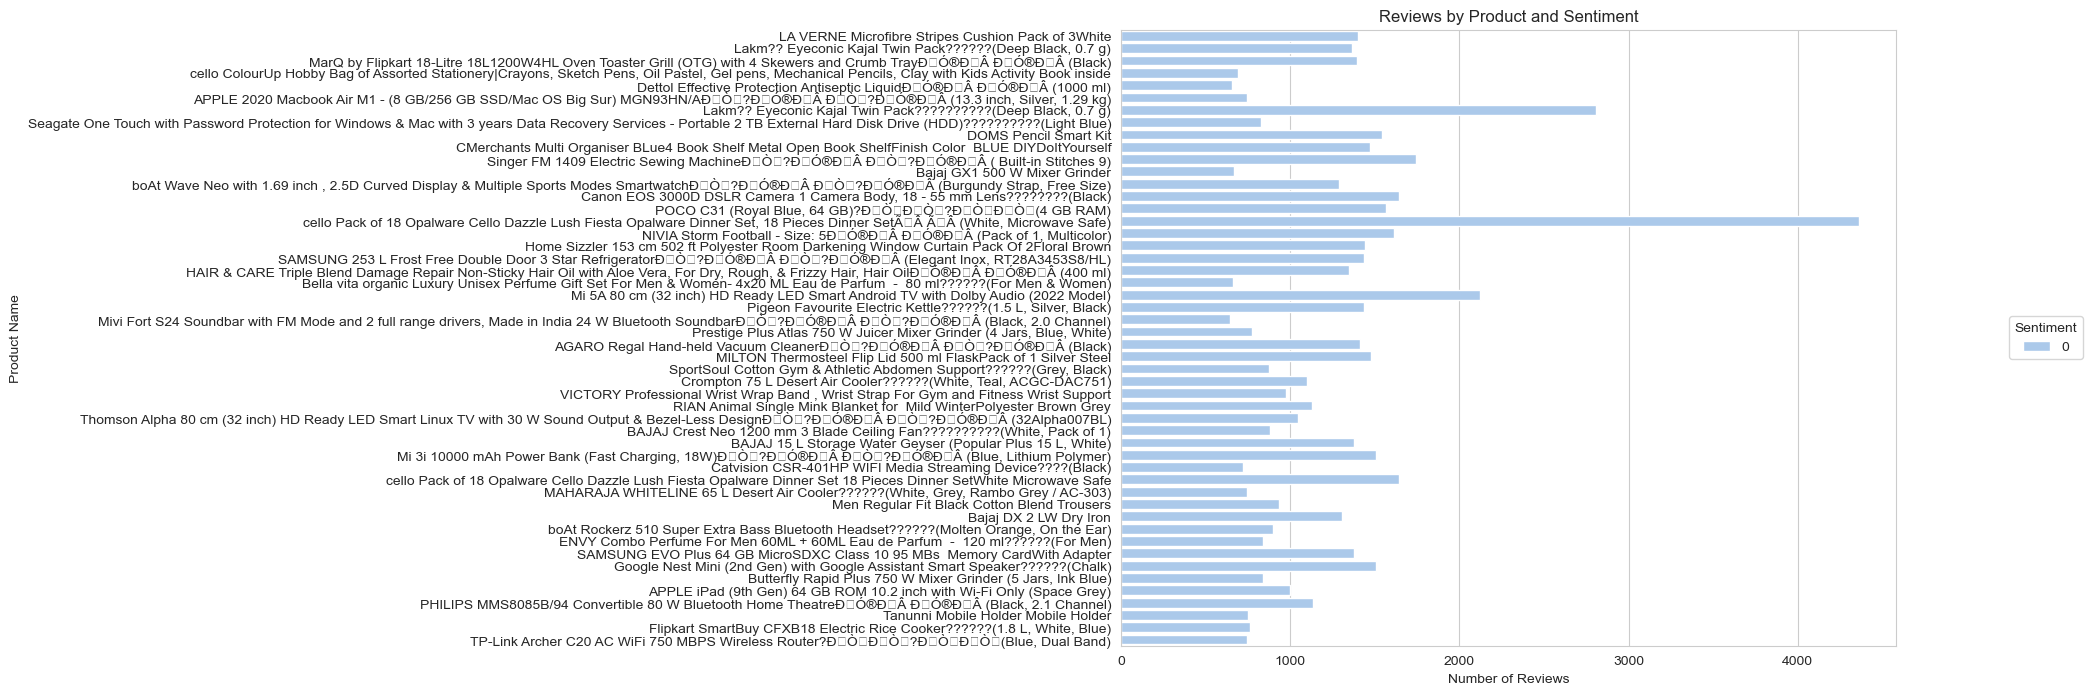

In [7]:
import pandas as pd
import nltk
import plotly.express as px
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
nltk.download('vader_lexicon')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(r"C:\Users\nh013\Desktop\flipkart.csv\Dataset-SA.csv")

# Remove any rows with missing values
df.dropna(inplace=True)

# Remove any duplicate rows
df.drop_duplicates(inplace=True)

# Remove any URLs
df['Review'] = df['Review'].apply(lambda x: re.sub(r'http\S+', '', x))

# Remove any special characters
df['Review'] = df['Review'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

# Convert all text to lowercase
df['Review'] = df['Review'].apply(lambda x: x.lower())

# Remove stop words
stop_words = set(stopwords.words('english'))
df['Review'] = df['Review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Apply stemming
stemmer = PorterStemmer()
df['Review'] = df['Review'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

# Assign labels to sentiments (positive = 1, negative = 0)
df['Sentiment'] = df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

# Add sentiment polarity scores using VADER
sid = SentimentIntensityAnalyzer()
df['Sentiment_Polarity'] = df['Review'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Get the top 50 products based on the number of reviews
top_products = df.groupby('product_name').size().nlargest(50).index.tolist()

# Create a new dataframe with only the top products
df_top_products = df[df['product_name'].isin(top_products)]

# Shuffle the rows of the dataframe
df_top_products = df_top_products.sample(frac=1).reset_index(drop=True)

# Convert the product_price column to numeric
df_top_products['product_price'] = pd.to_numeric(df_top_products['product_price'], errors='coerce')


# Convert the product_price column to numeric
df_top_products['Rate'] = pd.to_numeric(df_top_products['Rate'], errors='coerce')


# Compute the mean of the Rate column for each product
average_rate = df_top_products.groupby('product_name')['Rate'].mean().reset_index()
average_rate.rename(columns={'Rate': 'Average_Rate'}, inplace=True)

# Merge the average_rate dataframe with the best_selling_product dataframe
best_selling_product = df_top_products.groupby('product_name').agg({'product_price': 'mean', 'Sentiment': 'mean', 'Sentiment_Polarity': 'mean', 'Review': 'count'}).reset_index()
best_selling_product.rename(columns={'Review': 'Review Count'}, inplace=True)
best_selling_product.sort_values(by=['Review Count', 'Sentiment_Polarity', 'product_price'], ascending=False, inplace=True)
best_selling_product = pd.merge(best_selling_product, average_rate, on='product_name')

# Define a function to calculate the sentiment polarity of a review
def get_sentiment_polarity(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity

# Apply the function to the Review column to get the sentiment polarity of each review
df_top_products['Sentiment_Polarity'] = df_top_products['Review'].apply(get_sentiment_polarity)



# Print the resulting dataframes
print(best_selling_product.head())
print(df_top_products)


# Create a grouped bar chart
sns.set_style("whitegrid")
sns.set_palette("pastel")
plt.figure(figsize=(10, 8))
sns.countplot(y="product_name", hue="Sentiment", data=df_top_products)
plt.xlabel("Number of Reviews")
plt.ylabel("Product Name")
plt.title("Reviews by Product and Sentiment")
plt.legend(title="Sentiment", loc="center right", bbox_to_anchor=(1.25, 0.5))
plt.show()